# Importing the Dataset

In [1]:
#We begin by importing python libraries that we will need

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading Data from our dataset

df = pd.read_csv('http://bit.ly/autolib_dataset')

#Checking our dataset

df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [3]:
#Viewing information about our dataset

df.info

<bound method DataFrame.info of                                  Address  Cars  ...  hour  minute
0                    2 Avenue de Suffren     0  ...    11      43
1              145 Rue Raymond Losserand     6  ...     7      24
2       2 Avenue John Fitzgerald Kennedy     3  ...    20      14
3                 51 Rue EugÃ¨ne OudinÃ©     3  ...     4      37
4     6 avenue de la Porte de Champerret     3  ...    17      23
...                                  ...   ...  ...   ...     ...
4995                 8 avenue MÃ©nelotte     2  ...    11      26
4996                   37 rue de Dantzig     4  ...    16      56
4997                      142 rue du Bac     1  ...     7       1
4998         2 avenue du Val de Fontenay     2  ...    17      27
4999                 5 Rue Henry Brisson     4  ...    10       2

[5000 rows x 25 columns]>

In [4]:
#Checking shape of dataset

df.shape

(5000, 25)

In [5]:
#Checking the size of dataset

df.size

125000

## Cleaning our dataset

## Validity

In [6]:
#Dropping the irrelevant columns in our dataset

df.drop(['Address','Rental status','Cars', 'Charge Slots', 'Charging Status', 'Displayed comment', 'Geo point', 'Public name', 'Scheduled at', 'Station type', 'Subscription status'], axis=1, inplace=True)
df

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


In [7]:
#Remove syntax errors in our dataset
#Remove white spaces around our columns

df.columns = df.columns.str.strip()
df

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


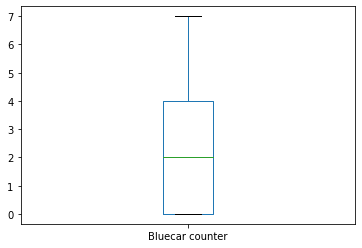

In [8]:
#Let's plot a box plot  to check for outliers in bluecar counter column

df.boxplot(column =['Bluecar counter'], grid = False )

#none noted

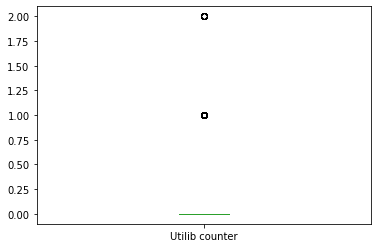

In [9]:
# plotting the Utilib counter boxplot

df.boxplot(column =['Utilib counter'], grid = False)

#there are outliers in utilib counter column

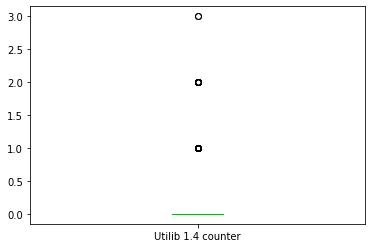

In [10]:
#checking for outliers in utilib 1.4 counter column

df.boxplot(column =['Utilib 1.4 counter'], grid= False)

#there are outliers

In [11]:
#Dropping Outliers using Inter Quartile Range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df1 =df[~((df < Q1 - 1.5 * IQR) | (df > Q3 + 1.5 * IQR)).any(axis=1)]

print(df1.shape)

print(df.shape)

(4210, 14)
(5000, 14)


##Completeness

In [12]:
#Checking for missing values

df1.isnull().sum()

Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
City                  0
ID                    0
Kind                  0
Postal code           0
Slots                 0
Status                0
year                  0
month                 0
day                   0
hour                  0
minute                0
dtype: int64

##Consistency

In [13]:
#Checking and dropping duplicates

df1.duplicated().sum()

0

##Uniformity

In [14]:
#We change all column names to lower case and replace the space with underscore

df1.columns = map(str.lower, df.columns)

columns = [ 'bluecar_counter', 'utilib_counter', 'utilib_1.4_counter', 'city', 'id', 'kind', 'postal_code', 'slots',  'status', 'year', 'month', 'day', 'hour', 'minute']

df1.columns = columns

df1.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter', 'city', 'id',
       'kind', 'postal_code', 'slots', 'status', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [15]:
#Datetype conversion

df1['datetime'] = pd.to_datetime(df1[['year','month','day','hour','minute']])
df1.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method NDFrame.head of       bluecar_counter  utilib_counter  ...  minute            datetime
0                   0               0  ...      43 2018-04-08 11:43:00
1                   6               0  ...      24 2018-04-06 07:24:00
4                   3               0  ...      23 2018-04-08 17:23:00
5                   0               0  ...       2 2018-04-06 07:02:00
6                   0               0  ...      20 2018-04-08 18:20:00
...               ...             ...  ...     ...                 ...
4995                2               0  ...      26 2018-04-06 11:26:00
4996                4               0  ...      56 2018-04-04 16:56:00
4997                1               0  ...       1 2018-04-01 07:01:00
4998                2               0  ...      27 2018-04-04 17:27:00
4999                4               0  ...       2 2018-04-08 10:02:00

[4210 rows x 15 columns]>

In [16]:
# Adding a usage column for the three car counters i.e bluecar_counter, utilib_counter and utilib_14_counter
# positive number means that a car was returned
# negative number means that a car was picked
# zero means that nothing happened, i.e no car was picked nor returned
#
# creating column for bluecar usage
df1['usage_blue'] = df1['bluecar_counter'].diff()

# creating column for utilib usage
df1['usage_utilib'] = df1['utilib_counter'].diff()

# creating column for utilib 14 usage
df1['usage_utilib_1.4'] = df1['utilib_1.4_counter'].diff()

#print the new created columns
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,datetime,usage_blue,usage_utilib,usage_utilib_1.4
0,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00,NaN,NaN,NaN
1,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00,6.0,0.0,0.0
4,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23,2018-04-08 17:23:00,-3.0,0.0,0.0
5,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2,2018-04-06 07:02:00,-3.0,0.0,0.0
6,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20,2018-04-08 18:20:00,0.0,0.0,0.0


##Analysis

#Question 1

In [17]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

df1[(df1.city == 'Paris') & (df1.usage_blue < 0)].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

hour
21    63
Name: hour, dtype: int64

##Question 2

In [25]:
#What station is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?
#Overall?
#At the most popular picking hour?
# Identifying the station that is the most popular overall
#
df1[(df1.kind == 'STATION') & (df1.status == 'ok')].groupby('id')[['kind']].count().sort_values(by = 'kind', ascending  = False).head(1)


,kind
id,
paris-voltaire-182,11


##Question 3

In [26]:
#Most popular postal code overall

df1[(df1.kind == 'STATION') & (df1.status == 'ok')].groupby('postal_code')[['postal_code']].count().sort_values(by = 'postal_code', ascending  = False).head(1)

ValueError: ignored